# ML UVA Project: Predicting Opioid Overdoses in VA

The below cell(s) are just importing packages,
setting some basic configuration,
and importing the Virginia data

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)
file_path_local = "clean_opioid.csv"

df = pd.read_csv(file_path_local)

## Data Discovery and Visualization
The next few cells encompass our discovery and visualization process.

In [3]:
df.head()

,fips,Diagnosed HIV,ED Heroin Overdose,ED Opioid Overdose,EMS Narcan,Fatal Fentanyl and/or Heroin Overdose,Fatal Prescription Opioid Overdose,Reported Hepatitis C (18-30 year olds),p_rate,locality_name,...,Language spoken at home - Non English,Unemployment Rate,Mean travel time to work,Median household income,Health Insurance Coverage,Health Insurance Coverage - Public,Below poverty,Median home value,Total population,Median Age
0,51001,3.0,6.1,60.7,48.6,12.1,12.1,135.1,60.7,Accomack County,...,10.6,7.0,21.3,38503,82.0,35.7,19.5,151900,33060,45.4
1,51003,2.8,8.4,84.2,15.9,0.9,0.9,23.6,59.1,Albemarle County,...,11.5,3.2,22.3,70342,92.0,22.6,9.7,317300,104287,38.9
2,51005,6.4,0.0,218.0,12.8,6.4,12.8,246.7,86.8,Alleghany County,...,2.1,4.6,24.4,45538,91.7,41.6,18.3,111500,15919,48.0
3,51007,7.7,0.0,54.2,23.2,7.7,0.0,340.3,48.1,Amelia County,...,1.1,4.0,36.7,58269,85.6,34.6,11.6,171500,12793,44.3
4,51009,6.3,0.0,79.0,19.0,3.2,6.3,61.7,75.0,Amherst County,...,4.0,5.5,25.0,47002,87.9,34.7,14.1,149400,31999,43.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 26 columns):
fips                                      133 non-null int64
Diagnosed HIV                             133 non-null float64
ED Heroin Overdose                        133 non-null float64
ED Opioid Overdose                        133 non-null float64
EMS Narcan                                133 non-null float64
Fatal Fentanyl and/or Heroin Overdose     133 non-null float64
Fatal Prescription Opioid Overdose        133 non-null float64
Reported Hepatitis C (18-30 year olds)    133 non-null float64
p_rate                                    122 non-null float64
locality_name                             133 non-null object
Average Household size                    133 non-null float64
High School graduate or higher            133 non-null float64
Veterans                                  133 non-null float64
With Disability                           133 non-null float64
Foreign Born    

In [5]:
df.describe()

,fips,Diagnosed HIV,ED Heroin Overdose,ED Opioid Overdose,EMS Narcan,Fatal Fentanyl and/or Heroin Overdose,Fatal Prescription Opioid Overdose,Reported Hepatitis C (18-30 year olds),p_rate,Average Household size,...,Language spoken at home - Non English,Unemployment Rate,Mean travel time to work,Median household income,Health Insurance Coverage,Health Insurance Coverage - Public,Below poverty,Median home value,Total population,Median Age
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,122.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000
mean,51263.992481,7.708271,13.405263,112.036090,46.347368,7.596992,6.045113,226.965414,93.045082,2.478045,...,7.249624,6.619549,27.534586,54078.413534,88.491729,33.277444,14.793985,200223.308271,6.248347e+04,41.576692
std,271.883038,9.578520,19.761411,81.528238,38.221021,8.539063,6.754880,261.715968,79.020369,0.242289,...,8.259243,2.504192,6.366830,19723.498829,3.296188,8.774244,6.817922,106084.743774,1.235467e+05,6.299782
min,51001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000,...,0.700000,1.300000,15.300000,26000.000000,77.700000,12.100000,2.700000,70500.000000,2.230000e+03,21.500000
25%,51069.000000,0.000000,0.000000,66.700000,19.200000,0.000000,0.000000,66.200000,44.225000,2.330000,...,2.500000,5.000000,22.500000,39911.000000,86.500000,26.500000,9.500000,125500.000000,1.483100e+04,38.600000
50%,51139.000000,5.300000,5.600000,102.100000,35.300000,5.700000,4.400000,127.900000,72.800000,2.460000,...,4.300000,6.300000,27.200000,49639.000000,88.500000,33.900000,14.200000,171700.000000,2.529000e+04,42.700000
75%,51550.000000,10.500000,18.600000,140.700000,63.700000,12.800000,9.000000,330.900000,113.275000,2.570000,...,8.700000,7.700000,31.400000,64049.000000,90.700000,41.400000,19.000000,241000.000000,5.456200e+04,45.400000
max,51840.000000,57.000000,99.400000,516.600000,210.200000,31.400000,40.100000,1776.900000,470.300000,3.350000,...,45.900000,18.800000,41.900000,125672.000000,96.600000,49.600000,39.300000,724000.000000,1.132887e+06,59.800000


In [6]:
df.corr()

,fips,Diagnosed HIV,ED Heroin Overdose,ED Opioid Overdose,EMS Narcan,Fatal Fentanyl and/or Heroin Overdose,Fatal Prescription Opioid Overdose,Reported Hepatitis C (18-30 year olds),p_rate,Average Household size,...,Language spoken at home - Non English,Unemployment Rate,Mean travel time to work,Median household income,Health Insurance Coverage,Health Insurance Coverage - Public,Below poverty,Median home value,Total population,Median Age
fips,1.000000,0.224897,0.209240,0.136897,0.478540,0.239031,0.042518,-0.078049,0.521259,-0.047172,...,0.305244,0.308469,-0.484126,-0.123834,-0.160702,-0.108683,0.334972,0.059597,0.023893,-0.570445
Diagnosed HIV,0.224897,1.000000,0.111642,0.049938,0.186004,0.262313,-0.026189,0.031140,-0.103041,0.031753,...,0.119432,0.233923,-0.037026,-0.040282,-0.088709,0.048288,0.161360,-0.011889,0.171458,-0.242325
ED Heroin Overdose,0.209240,0.111642,1.000000,0.260130,0.536983,0.470264,0.004895,-0.095948,-0.002631,0.216467,...,0.061147,0.070830,0.174497,0.136728,-0.089703,-0.219338,-0.196151,0.174689,0.083582,-0.189328
ED Opioid Overdose,0.136897,0.049938,0.260130,1.000000,0.313272,0.189808,0.326740,0.336243,0.393621,-0.093465,...,-0.094735,0.214673,-0.128522,-0.213409,0.006746,0.265181,0.197956,-0.212784,-0.051984,0.017602
EMS Narcan,0.478540,0.186004,0.536983,0.313272,1.000000,0.490072,0.147011,0.058678,0.240834,0.138636,...,0.183528,0.239173,-0.009352,-0.036580,-0.240852,-0.039504,0.084411,0.024468,0.026032,-0.298635
Fatal Fentanyl and/or Heroin Overdose,0.239031,0.262313,0.470264,0.189808,0.490072,1.000000,0.186955,-0.177409,-0.102620,0.235338,...,0.111507,0.045950,0.196978,0.161996,0.066166,-0.229862,-0.098370,0.140587,0.115686,-0.291430
Fatal Prescription Opioid Overdose,0.042518,-0.026189,0.004895,0.326740,0.147011,0.186955,1.000000,0.149894,0.244668,-0.014860,...,-0.081379,0.185809,-0.044508,-0.164372,0.010966,0.156092,0.161494,-0.173748,-0.037087,-0.086237
Reported Hepatitis C (18-30 year olds),-0.078049,0.031140,-0.095948,0.336243,0.058678,-0.177409,0.149894,1.000000,0.270579,-0.156622,...,-0.158261,0.107184,-0.037465,-0.241265,-0.025851,0.361264,0.133916,-0.315338,-0.157375,0.183352
p_rate,0.521259,-0.103041,-0.002631,0.393621,0.240834,-0.102620,0.244668,0.270579,1.000000,-0.258530,...,-0.072238,0.453414,-0.475531,-0.396461,-0.245141,0.343993,0.418780,-0.314891,-0.188630,-0.136480
Average Household size,-0.047172,0.031753,0.216467,-0.093465,0.138636,0.235338,-0.014860,-0.156622,-0.258530,1.000000,...,0.494189,-0.104370,0.453030,0.593630,0.015556,-0.568796,-0.397042,0.357567,0.329937,-0.314389


###### Issue
The output of this visualization is really hard to use unless you have a massive monitor so we are commenting it out

In [7]:
# pd.plotting.scatter_matrix(df, figsize=(12, 12), diagonal="kde")

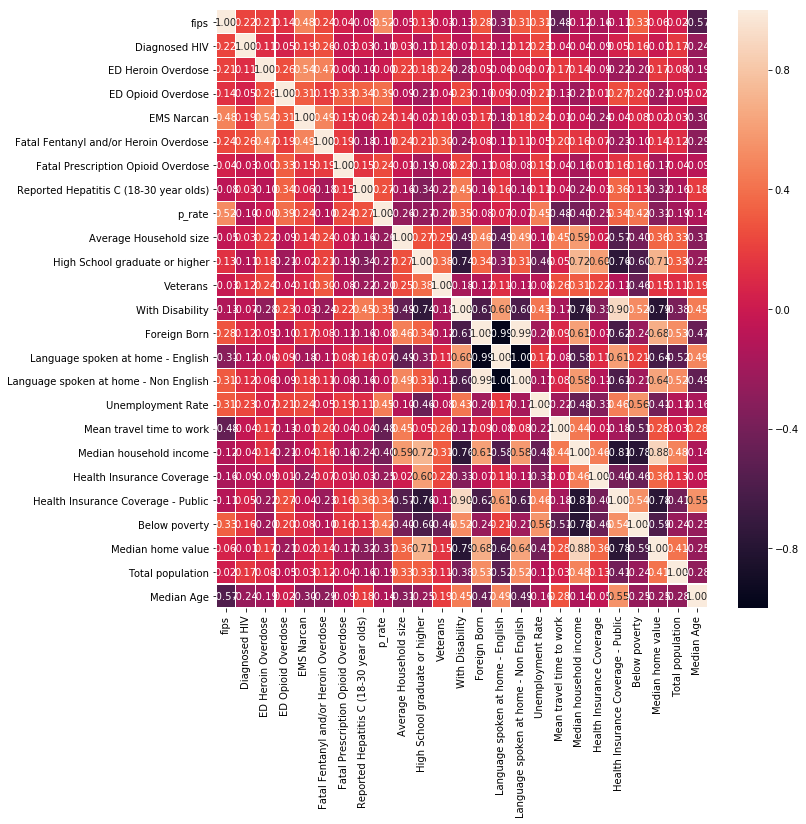

In [8]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

Really interesting correlations. Noticably, graduated from high school is strongly negatively correlated with disability.

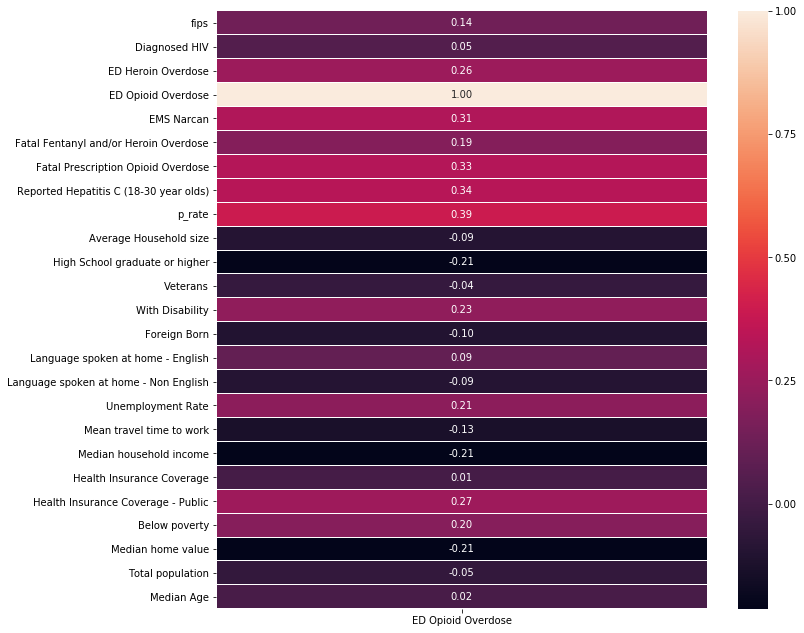

In [9]:
# plot corr ed opioid
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["ED Opioid Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

In [10]:
df2 = pd.read_csv("FINAL_DATA/all_data_ready_for_anal.csv")

In [11]:
df2.head()

,fips,opioid_presc_rate,total_population,average_household_size,percent_with_healthcare,median_household_income,median_age,perc_foreign_born,percent_grad_high_school,perc_male,poverty_population,opioid_death_rate
0,2020,66.3,299107,2.77,0.995386,78326,32.5,0.099640,0.929868,0.511931,23914,119.386
1,2050,NaN,17776,3.86,0.994949,51012,26.7,0.018452,0.789602,0.526046,4364,144.702
2,2070,NaN,4979,3.56,0.984733,54173,29.7,0.016670,0.865323,0.519984,894,NaN
3,2090,48.4,99705,2.69,1.000000,71068,30.4,0.050820,0.944219,0.536352,7752,67.591
4,2110,79.8,32531,2.62,0.996024,85746,37.0,0.078448,0.948044,0.511666,2110,120.118


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 12 columns):
fips                        2686 non-null int64
opioid_presc_rate           2646 non-null float64
total_population            2686 non-null int64
average_household_size      2686 non-null float64
percent_with_healthcare     2686 non-null float64
median_household_income     2686 non-null int64
median_age                  2686 non-null float64
perc_foreign_born           2686 non-null float64
percent_grad_high_school    2686 non-null float64
perc_male                   2686 non-null float64
poverty_population          2686 non-null int64
opioid_death_rate           2252 non-null float64
dtypes: float64(8), int64(4)
memory usage: 251.9 KB


In [13]:
df2.describe()

,fips,opioid_presc_rate,total_population,average_household_size,percent_with_healthcare,median_household_income,median_age,perc_foreign_born,percent_grad_high_school,perc_male,poverty_population,opioid_death_rate
count,2686.000000,2646.000000,2.686000e+03,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2.686000e+03,2252.000000
mean,30154.345123,79.226455,1.161099e+05,2.531217,0.996585,47223.814966,40.556925,0.046277,0.856026,0.499296,1.743806e+04,183.974161
std,15181.628318,41.237092,3.467404e+05,0.227804,0.007680,12177.574072,4.962302,0.054964,0.062221,0.021716,5.858355e+04,81.370870
min,1001.000000,0.000000,2.086000e+03,1.860000,0.803756,19328.000000,21.400000,0.000000,0.462797,0.405790,2.200000e+02,14.020000
25%,18135.500000,53.425000,1.571400e+04,2.390000,0.995848,39257.000000,37.600000,0.013865,0.817292,0.488629,2.383500e+03,128.262750
50%,29074.000000,74.950000,3.288500e+04,2.510000,1.000000,45366.500000,40.700000,0.026963,0.869458,0.495044,5.238000e+03,175.592500
75%,45032.500000,101.600000,8.175425e+04,2.630000,1.000000,52359.750000,43.500000,0.056963,0.902612,0.503382,1.254125e+04,230.190250
max,56045.000000,470.300000,1.003839e+07,3.860000,1.000000,123453.000000,65.300000,0.516537,0.976802,0.732225,1.800265e+06,638.395000


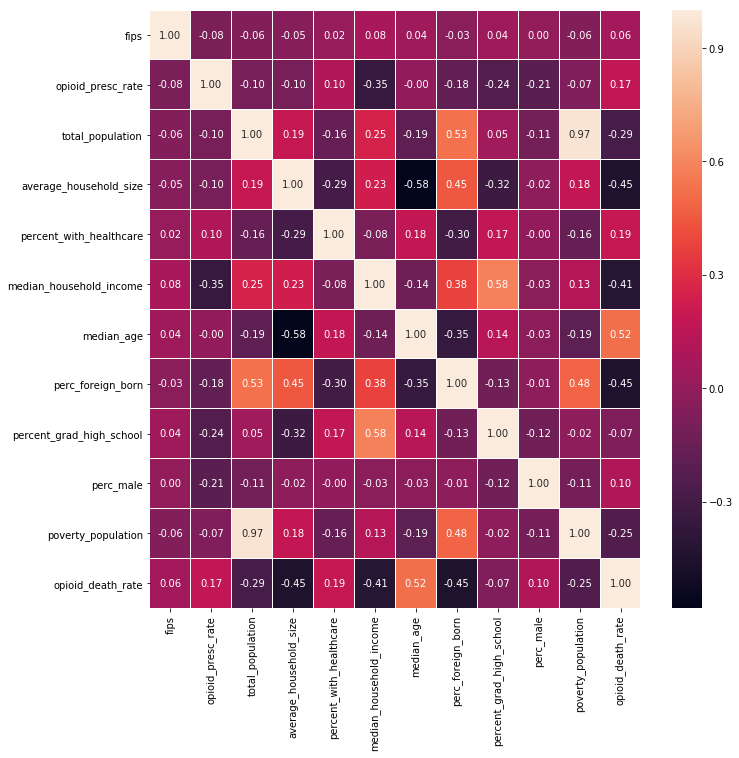

In [14]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df2.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

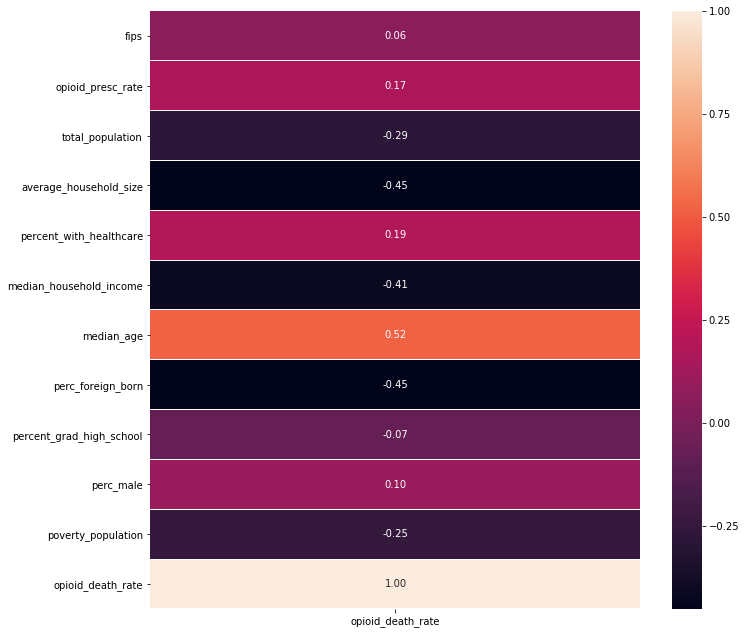

In [15]:
# plot corr ed opioid
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df2.corr()["opioid_death_rate"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

In [16]:
df2[["opioid_death_rate"]] = df2[["opioid_death_rate"]].dropna()

Important to note that there aren't many features, besides other overdoses, that correlate strongly with overdose. This is an early indication that a linear model probably won't be very accurate.

## Trying Different Models: Machine Learning!!!

splitting up our virginia data into training and testing

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
# print("Before NA removed:", df.shape)
# df = df.dropna()
# print("After NA removed:", df.shape)
# df = df[df.locality_name != "Galax City"]
x_data, y_data = df.drop(["ED Opioid Overdose", "locality_name", "fips"], axis=1), df["ED Opioid Overdose"]
y_data 

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #impute missing values
        ('std_scaler', StandardScaler()),
])
x_clean = num_pipeline.fit_transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_clean, y_data, test_size=0.2, random_state=42)
#print("X train shape:", x_train.shape)
#print("Y train shape:", y_train.shape)
#print("X test shape:", x_test.shape)
#print("Y test shape:", y_test.shape)

Linear RMSE: 78.91794517258298
Linear R^2: 0.31601475592149364


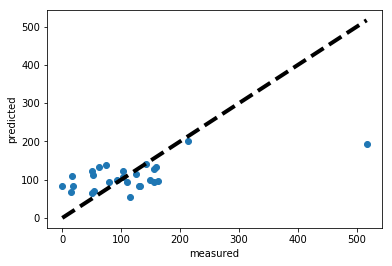

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
print("Linear RMSE:", str(np.sqrt(mean_squared_error(y_test, y_predict))))
print("Linear R^2:", str(r2_score(y_test, y_predict)))
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [19]:
from sklearn.linear_model import SGDRegressor

SGD = SGDRegressor(learning_rate='optimal',max_iter=3000, tol=.0000003, early_stopping=False, eta0=.0002, loss="squared_epsilon_insensitive")
SGD.fit(x_train, y_train)
pred = SGD.predict(x_test)
print("SGD RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

SGD RMSE: 34693750115725.42


Polynomial RMSE: 95.77161975306933
Polynomial R^2: -0.007323254981188798


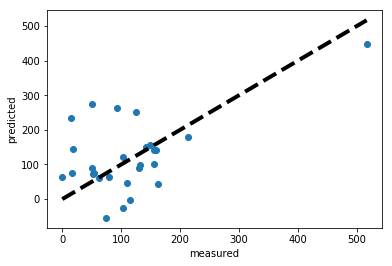

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz

poly = PolynomialFeatures(2)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
lr = LinearRegression()
lr.fit(poly_x_train,y_train)
y_predict = lr.predict(poly_x_test)
print("Polynomial RMSE: "  + str(np.sqrt(mean_squared_error(y_test, y_predict))))
print("Polynomial R^2: " + str(r2_score(y_test, y_predict)))

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(random_state=42)
RF.fit(x_train, y_train)
pred = RF.predict(x_test)
print("Random Forest RMSE: " + str(np.sqrt(mean_squared_error(y_test, pred))))

Random Forest RMSE: 83.73603403730259


c:\users\andrew\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
from sklearn.tree import DecisionTreeRegressor

DF = DecisionTreeRegressor(random_state=42)
DF.fit(x_train, y_train)
pred = DF.predict(x_test)
print("Decision Tree RMSE: " + str(np.sqrt(mean_squared_error(y_test, pred))))

Decision Tree RMSE: 87.66980560497906


Now let's do some cross validation and feature selection

In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LassoCV, Lasso

alphas = 10**np.linspace(6,-2,50)*0.5
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_clean, y_data)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

# Use the cross-validation package to split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(x_clean, y_data, test_size=0.2, random_state=42)

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=x_data.columns)

Alpha= 0.44134975473732796
mse =  7255.469734038399
best model coefficients:


Diagnosed HIV                              0.000000
ED Heroin Overdose                        21.027845
EMS Narcan                                 0.000000
Fatal Fentanyl and/or Heroin Overdose      2.486214
Fatal Prescription Opioid Overdose        18.022130
Reported Hepatitis C (18-30 year olds)     1.666197
p_rate                                     7.857177
Average Household size                    -0.000000
High School graduate or higher            -0.000000
Veterans                                  -0.000000
With Disability                            0.000000
Foreign Born                               0.000000
Language spoken at home - English         -0.000000
Language spoken at home - Non English      0.000000
Unemployment Rate                          0.000000
Mean travel time to work                  -3.173746
Median household income                   -0.000000
Health Insurance Coverage                  6.254921
Health Insurance Coverage - Public        16.428875
Below povert

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 12 columns):
fips                        2686 non-null int64
opioid_presc_rate           2646 non-null float64
total_population            2686 non-null int64
average_household_size      2686 non-null float64
percent_with_healthcare     2686 non-null float64
median_household_income     2686 non-null int64
median_age                  2686 non-null float64
perc_foreign_born           2686 non-null float64
percent_grad_high_school    2686 non-null float64
perc_male                   2686 non-null float64
poverty_population          2686 non-null int64
opioid_death_rate           2252 non-null float64
dtypes: float64(8), int64(4)
memory usage: 251.9 KB


In [26]:
#imports for the national stuff
df2 = df2.dropna()
x_data2, y_data2 = df2.drop(["opioid_death_rate", "fips"], axis=1), df2["opioid_death_rate"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #impute missing values
        ('std_scaler', StandardScaler())
])
x_clean2 = num_pipeline.fit_transform(x_data2)
print("NAs:", np.isnan(x_clean2).sum())
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_clean2, y_data2, test_size=0.2, random_state=42)
# print(x_train)
# print(y_train)

NAs: 0


Linear RMSE: 60.540278907857406
Linear R^2: 0.4013177809471471


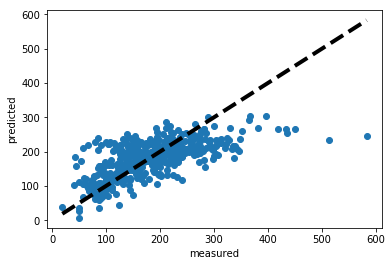

In [27]:
from sklearn.linear_model import LinearRegression, SGDRegressor

lr = LinearRegression()
lr.fit(x_train2,y_train2)
y_predict2 = lr.predict(x_test2)
print("Linear RMSE: "  + str(np.sqrt(mean_squared_error(y_test2, y_predict2))))
print("Linear R^2: " + str(r2_score(y_test2, y_predict2)))
fig, ax = plt.subplots()
ax.scatter(y_test2, y_predict2)
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

Polynomial RMSE: 60.540278907857406
Polynomial R^2: 0.4013177809471471


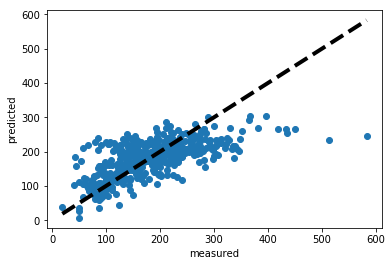

In [28]:
poly = PolynomialFeatures(2)
poly_x_train2 = poly.fit_transform(x_train2)
poly_x_test2 = poly.fit_transform(x_test2)
lr = LinearRegression()
lr.fit(poly_x_train2,y_train2)
y_predict = lr.predict(poly_x_test2)
print("Polynomial RMSE: "  + str(np.sqrt(mean_squared_error(y_test2, y_predict2))))
print("Polynomial R^2: " + str(r2_score(y_test2, y_predict2)))
fig, ax = plt.subplots()
ax.scatter(y_test2, y_predict2)
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor


RF = RandomForestRegressor(random_state=42)
RF.fit(x_train2, y_train2)
pred = RF.predict(x_test2)
print("Random Forest: " + str(np.sqrt(mean_squared_error(y_test2, pred))))

Random Forest: 56.963000312948026


c:\users\andrew\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
from sklearn.tree import DecisionTreeRegressor

DF = DecisionTreeRegressor(random_state=42)
DF.fit(x_train2, y_train2)
pred = DF.predict(x_test2)
print("Decision Tree: " + str(np.sqrt(mean_squared_error(y_test2, pred))))

Decision Tree: 79.45398463878294


In [33]:
dot_data = StringIO()
export_graphviz(DF, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [ ]:
# SGD = SGDRegressor(learning_rate='optimal',max_iter=3000, tol=.0000003, early_stopping=False, eta0=.0002, loss="squared_epsilon_insensitive")
# SGD.fit(x_train, y_train)
# pred = SGD.predict(x_test)
# print(np.sqrt(mean_squared_error(y_test, pred)))

In [34]:
va_national = pd.read_csv("virginia_national_data.csv")
x_dataVA, y_dataVA = va_national.drop(["opioid_death_rate", "fips"], axis=1), va_national["opioid_death_rate"]


non_va = pd.read_csv("non-virginia_national_data.csv")
x_dataUS, y_dataUS = non_va.drop(["opioid_death_rate", "fips"], axis=1), non_va["opioid_death_rate"]


randForestNational = RandomForestRegressor(random_state=42)
randForestNational.fit(x_dataUS, y_dataUS)
va_prediction = randForestNational.predict(x_dataVA)
print("Random Forest: " + str(np.sqrt(mean_squared_error(y_testVA, va_prediction))))


c:\users\andrew\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').